<h1>Trabajo Muestreo-Interferencia</h1>
<!----Hey hey!!!---->

<h2>Asignatura: Estadistica 2</h2>

<h3>Profesor: Carlos Alfonso Mantilla Duarte
<br>
Grupo: F1</h3>

<h4> Andrés Felipe Uribe García - 2160793
<br>Julian - 212121
<br>Isabel - 212121</h4>

En los siguientes enlaces encontrará los datos relacionados con los resultados de las pruebas de estado para las Instituciones de Educación Superior (IES) colombianas de carácter universitario de los últimos tres (3) años:

 https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData

Considere estos datos como una población finita. Las variables que componen la tabla son:



 - `periodo:` año de realización de la prueba. La variable se presenta fragmentada debido al origen de los datos. Requiere agruparse adecuadamente. Para ello, consulte la función revalue y describa, brevemente, su funcionamiento.
 -  `apli_consecutivo:` consecutivo asignado al estudiante en el momento de presentar la prueba. Único por estudiante
 -  `estu_depto_reside:` departamento de residencia del estudiante
 -   `estu_cod_reside_depto:` código DANE del departamento de residencia del estudiante
 -   `inst_cod_institucion:` código de la IES ante el ministerio. Único por Institución
 -   `inst_nombre_institucion:` Nombre de la Institución. Algunas presentan sedes y subsedes
 -   `raz_cuant_punt:` Puntaje Razonamiento Cuantitativo
 -   `raz_cuant_des:` Nivel de Desempeño Razonamiento Cuantitativo (categórica)
 -   `lect_crit_punt:` Puntaje Lectura Crítica
 -   `lect_crit_des:` Nivel de Desempeño Lectura Crítica (categórica)
 -   `comp_ciud_punt:` Puntaje Competencias Ciudadanas
 -   `comp_ciud_des:` Nivel de Desempeño Competencias Ciudadanas (categórica)
 -   `ingles_punt:` Puntaje Inglés
 -   `ingles_desem:` Nivel de Desempeño en Inglés (categórica)
 -  `comu_escr_punt:` Puntaje Comunicación Escrita
 -  `comu_escr_des:` Nivel de Desempeño Comunicación Escrita (categórica)

Tenga en cuenta que algunas variables categóricas figuran como numéricas, haga la correspondiente transformación.

Los puntos a desarrollar son:


   1. Realice muestreo aleatorio simple y realice las estimaciones (inferencia) correspondientes. Tenga en cuenta que son múltiples variables
   2.  Realice los correspondientes muestreos estratificados y compare los resultados con los anteriores. Explique las diferencias y/o similitudes
   3.  Realice los correspondientes muestreos por conglomerados y compare los resultados con los puntos 1 y 2. Explique las diferencias y/o similitudes
   4.  ¿Considera que es procedente realizar un muestreo sistemático? Argumente su respuesta
    Si la respuesta del punto 4 fue positiva, realice el correspondiente muestreo y compare con los anteriores
   5.  Para las estimaciones emplee los siguientes niveles de confianza: 90%, 95% y 99%.

El trabajo puede entregarse en formato PDF o como notebook de jupyter

Recomendaciones:

 -   Procure tabular de manera adecuada las estimaciones para optimizar espacio
 -   Evite extenderse en las explicaciones
 -   Trate de optimizar el uso de gráficas (visite el siguiente repositorio si desea una guía: https://github.com/karlosmantilla/graficas-basicas-descriptivas-
 -   Referencie las fórmulas empleadas en los cálculos


In [43]:
library(samplingbook) # llamamos la librería
load('saberpro.RData')
ls() 
dim(sp161718)

ERROR: Error in library(samplingbook): there is no package called 'samplingbook'


In [5]:
mystats <- function(x, na.omit=FALSE){
  if (na.omit)
  x <- x[!is.na(x)]
  m <- mean(x)
  n <- length(x)
  s <- sd(x)
  skew <- sum((x-m)^3/s^3)/n
  kurt <- sum((x-m)^4/s^4)/n - 3
  return(c("tamaño"=n, "media"=m, "desviación estándar"=s, "simetría"=skew, "kurtosis"=kurt))
}

In [6]:
Datos<-get(load("saberpro.RData"))

In [7]:
head(Datos); tail(Datos) # Primeras y últimas observaciones de la tabla

,periodo,apli_consecutivo,estu_depto_reside,estu_cod_reside_depto,inst_cod_institucion,inst_nombre_institucion,raz_cuant_punt,raz_cuant_des,lect_crit_punt,lect_crit_des,comp_ciud_punt,comp_ciud_des,ingles_punt,ingles_desem,comu_escr_punt,comu_escr_des
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>
1,20163,EK201630062726,ATLANTICO,8,1202,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,160,3,130,2,167,3,160,A2,155,3
2,20163,EK201630208121,CUNDINAMARCA,25,2725,POLITECNICO GRANCOLOMBIANO-BOGOTÃ D.C.,138,2,132,2,77,1,125,A1,164,3
3,20163,EK201630220210,CALDAS,17,2829,CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO-BOGOTÃ D.C.,146,2,157,2,150,2,104,A1-,122,2
4,20163,EK201630180243,MAGDALENA,47,10413,IED ESCUELA NORMAL SUPERIOR MARÃA AUXILIADORA - SEDE PRINCIPAL-SANTA MARTA,160,3,172,3,151,2,160,A2,192,4
5,20163,EK201630225077,CORDOBA,23,1113,UNIVERSIDAD DE CORDOBA-MONTERIA,130,2,122,1,144,2,192,B1,131,2
6,20163,EK201630189735,CAUCA,19,1807,UNIVERSIDAD LIBRE-CALI,159,3,129,2,147,2,108,A1-,154,3


,periodo,apli_consecutivo,estu_depto_reside,estu_cod_reside_depto,inst_cod_institucion,inst_nombre_institucion,raz_cuant_punt,raz_cuant_des,lect_crit_punt,lect_crit_des,comp_ciud_punt,comp_ciud_des,ingles_punt,ingles_desem,comu_escr_punt,comu_escr_des
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>
725290,20183,EK201830220242,VALLE,76,2114,ESCUELA NACIONAL DEL DEPORTE-CALI,125,1,111,1,100,1,134,A1,140,2
725291,20183,EK201830103468,SANTANDER,68,2847,"CORPORACION UNIVERSITARIA DE INVESTIGACION Y DESARROLLO -""UDI""-BUCARAMANGA",182,3,145,2,152,2,167,A2,154,3
725292,20183,EK201830186897,BOGOTA,11,9104,"ESCUELA MILITAR DE CADETES ""GENERAL JOSE MARIA CORDOVA""-BOGOTÃƒÂ D.C.",149,2,129,2,110,1,168,A2,122,2
725293,20183,EK201830155382,SANTANDER,68,2207,INSTITUTO UNIVERSITARIO DE LA PAZ-BARRANCABERMEJA,185,3,173,3,190,3,148,A2,178,3
725294,20183,EK201830225312,,NA,1201,UNIVERSIDAD DE ANTIOQUIA-MEDELLIN,179,3,165,3,192,3,156,A2,150,3
725295,20183,EK201830039482,SUCRE,70,2823,CORPORACION UNIVERSITARIA DEL CARIBE - CECAR-SINCELEJO,135,2,122,1,99,1,132,A1,138,2


<h2>Definición de los datos</h2>

In [25]:
PT<-data.frame(C=Datos$estu_cod_reside_depto,
               T=(Datos$raz_cuant_punt +
                Datos$lect_crit_punt +
                Datos$comp_ciud_punt +
                Datos$ingles_punt +
                Datos$comu_escr_punt)/5, # Global
                RC=Datos$raz_cuant_punt,
                LC=Datos$lect_crit_punt,
                CC=Datos$comp_ciud_punt,
                I=Datos$ingles_punt,
                CE=Datos$comu_escr_punt,
                D=Datos$estu_depto_reside)


In [26]:
pop<-round(mystats(PT[,'I']),1)
data.frame(pop)

,pop
,<dbl>
tamaño,725295.0
media,150.4
desviación estándar,31.9
simetría,0.3
kurtosis,1.5


<h3>Tamaño adecuado de la muestra</h3>

In [27]:
#c("tamaño"=n, "media"=m, "desviación estándar"=s, "simetría"=skew, "kurtosis"=kurt)
#error del 5%
e=0.05*pop['media'] #Error * Media
s=pop['desviación estándar'] #Desviación Estandar
sample.size.mean(e,s, level = 0.95)
e=0.01*pop['media'] #Error * Media
sample.size.mean(e,s, level = 0.99)

ERROR: Error in sample.size.mean(e, s, level = 0.95): no se pudo encontrar la función "sample.size.mean"


In [28]:
n1<-70
Rf1<- sample(1:nrow(PT),size=n1,replace=FALSE)
n2<-2985
Rf2<- sample(1:nrow(PT),size=n2,replace=FALSE)

<h1>1- Muestreo Simple</h1>
<H4>Total vs Razonamiento cuantitativo - Inglés - Lectura Crítica</H4>

<h3>Primer Muestreo N = 134</h3>
Nivel de confianza del $95\%$
Error del $5\%$

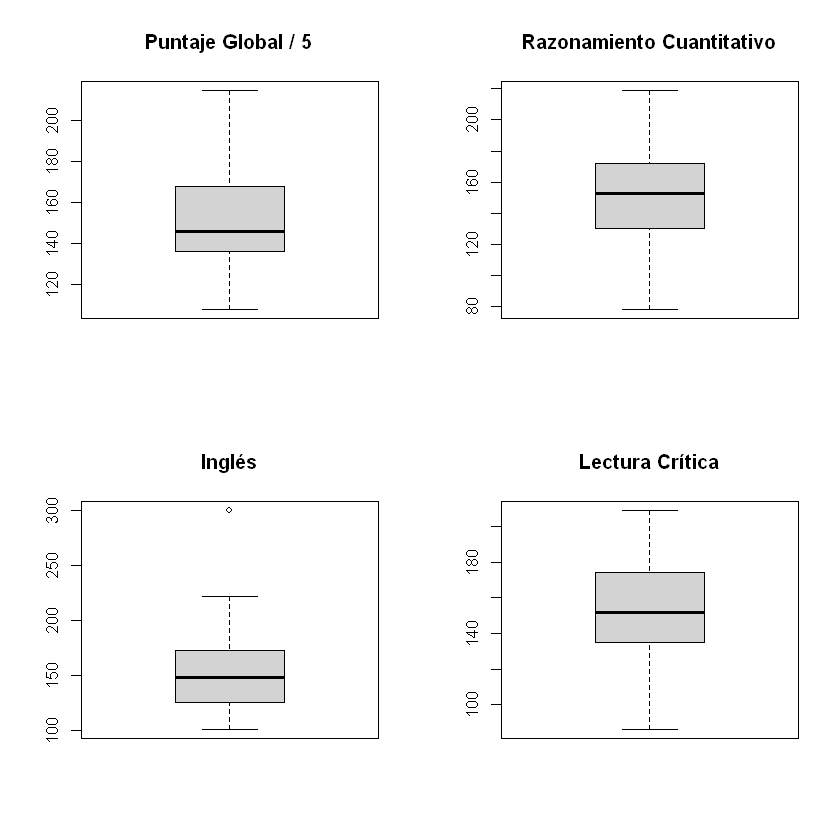

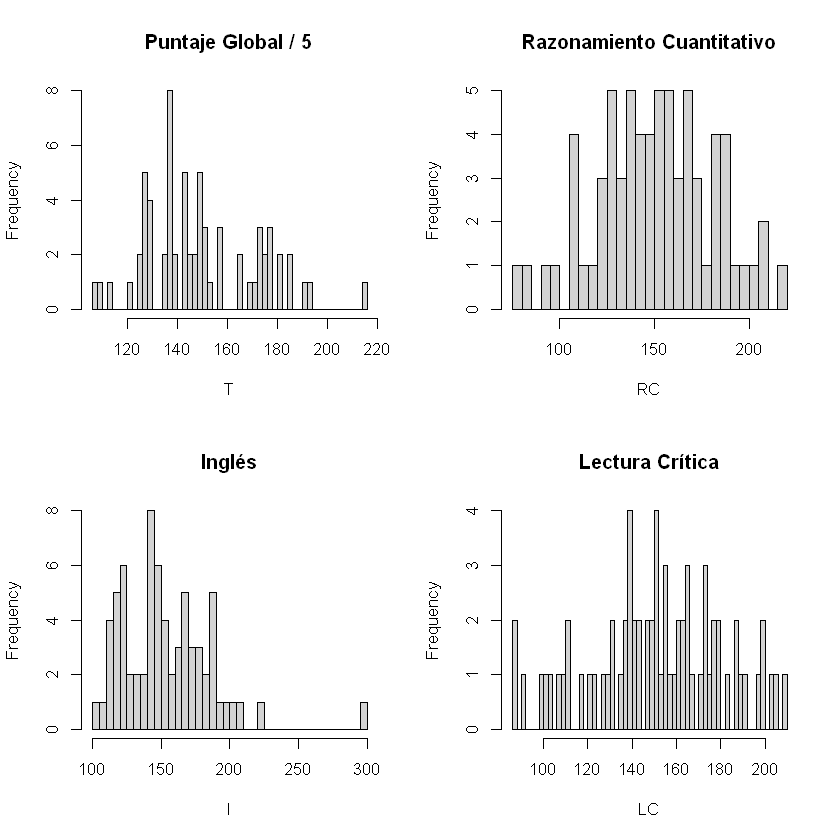

In [29]:
par(mfrow=c(2,2))

with(PT[Rf1,], boxplot(T, main = 'Puntaje Global / 5'))
with(PT[Rf1,], boxplot(RC, main = 'Razonamiento Cuantitativo'))
with(PT[Rf1,], boxplot(I, main = 'Inglés'))
with(PT[Rf1,], boxplot(LC, main = 'Lectura Crítica'))

with(PT[Rf1,], hist(T, nclass = 50, main = 'Puntaje Global / 5'))
with(PT[Rf1,], hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(PT[Rf1,], hist(I, nclass = 50, main = 'Inglés'))
with(PT[Rf1,], hist(LC, nclass = 50, main = 'Lectura Crítica'))
par(mfrow=c(1,1))

<h3>Segundo Muestreo N = 2985</h3>
Nivel de confianza del $99\%$
Error del $1\%$

In [ ]:
par(mfrow=c(2,2))
with(PT[Rf2,], boxplot(T, main = 'Puntaje Global / 5'))
with(PT[Rf2,], boxplot(RC, main = 'Razonamiento Cuantitativo'))
with(PT[Rf2,], boxplot(I, main = 'Inglés'))
with(PT[Rf2,], boxplot(LC, main = 'Lectura Crítica'))
with(PT[Rf2,], hist(T, nclass = 50, main = 'Puntaje Global / 5'))
with(PT[Rf2,], hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(PT[Rf2,], hist(I, nclass = 50, main = 'Inglés'))
with(PT[Rf2,], hist(LC, nclass = 50, main = 'Lectura Crítica'))
par(mfrow=c(1,1))

<h3>Población Total</h3>

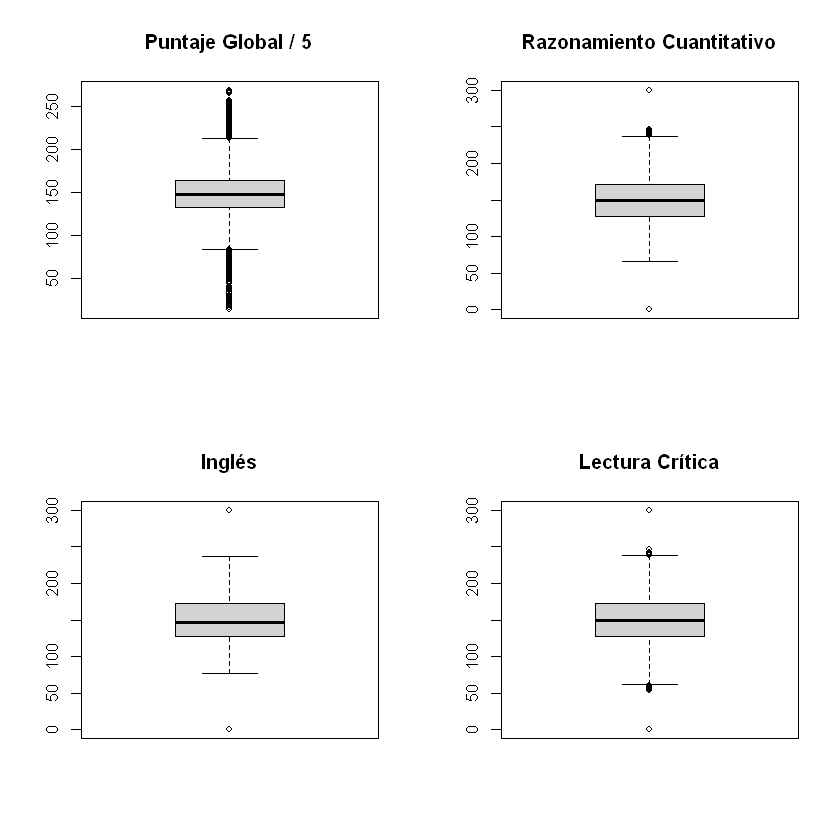

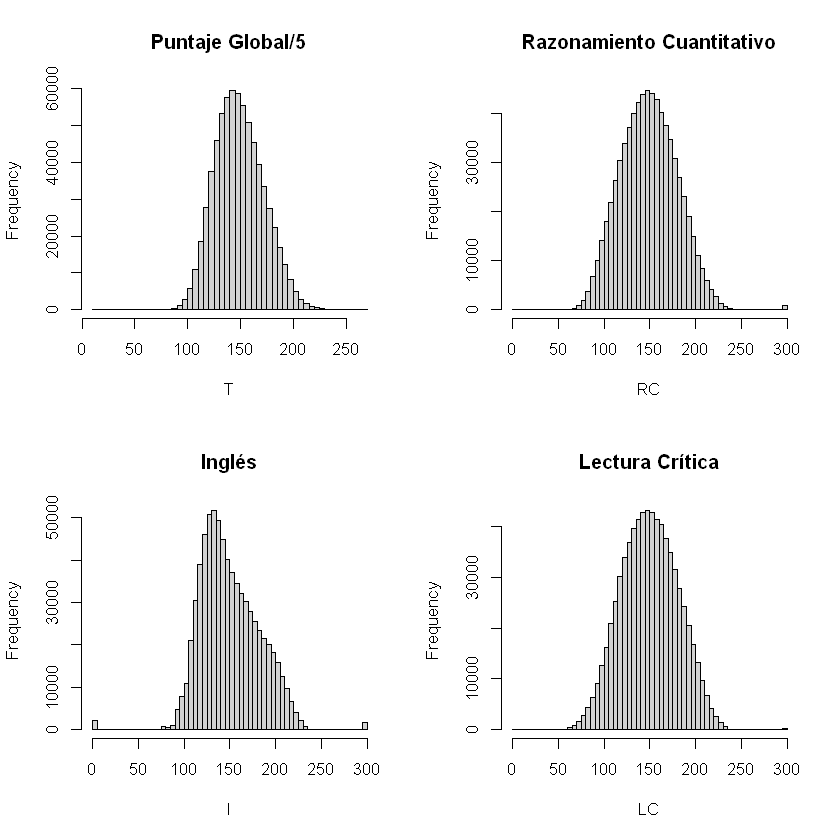

In [30]:
par(mfrow=c(2,2))
with(PT, boxplot(T, main = 'Puntaje Global / 5'))
with(PT, boxplot(RC, main = 'Razonamiento Cuantitativo'))
with(PT, boxplot(I, main = 'Inglés'))
with(PT, boxplot(LC, main = 'Lectura Crítica'))
with(PT, hist(T, nclass = 50, main = 'Puntaje Global/5'))
with(PT, hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(PT, hist(I, nclass = 50, main = 'Inglés'))
with(PT, hist(LC, nclass = 50, main = 'Lectura Crítica'))
par(mfrow=c(1,1))

### Inferencia

Para este caso comparamos 3 variables; Razonamiento cuantitativo, inglés, Lectura Crítica con respecto a una 4 creada para entrar en contexto la cual es "Puntaje Global"/"Total" el cual definimos como la suma de todas las variables divididas por 5

Las gráficas las creamos tomando 2 tamaños de muestra distintos el primero N = 134 con Nivel de confianza del $95\%$ y Error del $5\%$, el segundo como N = 2985 con Nivel de confianza del $99\%$ y Error del $1\%$ ambos con respecto a la población total

Podemos apreciar un comportamiento para el cual el primer muestreo, si bien dio resultados decentes, no nos permitía apreciar un nivel de detalle adecuado, mientras que el 2 no dista de los resultados obtenidos de la población total a un menor costo computacional

De los resultados obtenidos podemos apreciar que la asignatura inglesa representa un mayor reto para la mayoría de los estudiantes teniendo un pico mucho pronunciado hacia los 120 pts. decayendo con una pendiente mayor hacia los puntajes más altos a diferencia de Razonamiento Cuantitativo y Lectura crítica que pueden ser fácilmente modeladas por una distribución normal


<h1>2- Muestreo Estratificado</h1>

In [2]:
library(dplyr)
library(magrittr) # las librerias 


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




<H4>Las variables a usar para la estratificacion periodo,ingles_punt</H4>

In [8]:
PTE<-data.frame(C=Datos$estu_cod_reside_depto,
               T=(Datos$raz_cuant_punt +
                Datos$lect_crit_punt +
                Datos$comp_ciud_punt +
                Datos$ingles_punt +
                Datos$comu_escr_punt)/5, # Global
                RC=Datos$raz_cuant_punt,
                LC=Datos$lect_crit_punt,
                CC=Datos$comp_ciud_punt,
                I=Datos$ingles_punt,
                P=Datos$periodo,
                CE=Datos$comu_escr_punt,
                D=Datos$estu_depto_reside)

In [9]:
head(PTE)

,C,T,RC,LC,CC,I,P,CE,D
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,8,154.4,160,130,167,160,20163,155,ATLANTICO
2,25,127.2,138,132,77,125,20163,164,CUNDINAMARCA
3,17,135.8,146,157,150,104,20163,122,CALDAS
4,47,167.0,160,172,151,160,20163,192,MAGDALENA
5,23,143.8,130,122,144,192,20163,131,CORDOBA
6,19,139.4,159,129,147,108,20163,154,CAUCA


In [10]:

Estratificacion<- PTE %>%
                  select(P,I)%>%
                  group_by(P) %>%
                  summarise(n=n(), s=sd(I),.groups = 'drop') %>%
                  mutate(p=n/sum(n))

Estratificacion

P,n,s,p
<int>,<int>,<dbl>,<dbl>
20162,1308,34.21712,0.0018034041
20163,241320,31.71638,0.3327197899
20172,1408,34.81481,0.0019412791
20173,244158,31.49636,0.3366326805
20182,1527,29.40017,0.0021053502
20183,235201,32.20697,0.3242832227
20184,373,32.00844,0.0005142735


In [11]:
library('SamplingUtil') #esta libreria permite calcular los estratos

ahora hallaremos las proporciones que se usaran en las muestras de cada estrato,con tamaño de 300,500 y 1000

In [12]:
nsizeProp300<-nstrata(n=300,wh=Estratificacion[,4],method="proportional")
nsizeProp500<-nstrata(n=500,wh=Estratificacion[,4],method="proportional")
nsizeProp1000<-nstrata(n=1000,wh=Estratificacion[,4],method="proportional")

In [13]:
data.frame(periodo=Estratificacion$P,nsizeProp300,nsizeProp500,nsizeProp1000)

periodo,p,p.1,p.2
<int>,<dbl>,<dbl>,<dbl>
20162,1,1,2
20163,100,167,333
20172,1,1,2
20173,101,169,337
20182,1,2,3
20183,98,163,325
20184,1,1,1


tenemos las proporciones y con ellas vamos a relizar las respectivas muestras simples 

In [15]:
n2016230<-1
muestra2016230<- sample(1:nrow(PTE[PTE$P=='20162',]),size=n2016230,replace=FALSE)
muestra2016230

[1] 538

In [16]:
n2016330<-100
muestra2016330<- sample(1:nrow(PTE[PTE$P=='20163',]),size=n2016330,replace=FALSE)
muestra2016330

[1]  92349 102096 180496 228217  92689  52141 198567 218546 122065  63787
 [11] 228743  30467 155756  69204   5969  31681 120028 152244  19864  40079
 [21] 125711 110164  34039  39552 121623 164540 136729  82051 111050 193480
 [31] 217200 154131  74381  13265 123216  12127  31348 122142  54741  47796
 [41] 208921  63392  96487 159771  97465 189862 118600  36721 197685 227939
 [51]  86240   5438 175924 181374  80822 184197 124893  32936   3138  50495
 [61] 145572 168597 231746  27719  73960 141670 213740 235745 219870 219048
 [71]  12668 181268  68244  55220  59024   8806 101397 206671 143313  89632
 [81]   8146 130760  80171 135838 171937   4799 128571 167208 184715 131919
 [91] 229785    380  90755 171808 110601  81520  69257 117006  98160  86171

In [17]:
n201721<-1
muestra2017230<- sample(1:nrow(PTE[PTE$P=='20172',]),size=n201721,replace=FALSE)
muestra2017230

[1] 208

In [18]:
n20173100<-101
muestra20173100<- sample(1:nrow(PTE[PTE$P=='20173',]),size=n20173100,replace=FALSE)
muestra20173100

[1] 149397  35622 112901 226143  23626  91478 160022  49650 112695 192074
 [11]  88546 197371 213936 127904  58433 126690 167169 114238  53837  75947
 [21] 166490  20172 131902  79727 213012 160500 146731 118061  52269 159144
 [31] 143034 100681 179136  43209 235992 126676  46231  66096 239550 226989
 [41]  83212 226005 126735   5699  91404  85331  17689 151499  62696  25279
 [51] 214606 205528 211590  54926  36866 243080 213482 118918  41744 157875
 [61]  78186 125845 195750  16051 110522 174718  90683  56428  53107   1485
 [71]  77847 242223 196044 143666 115179  27977 201275  80856 102539 237841
 [81] 212591 143031 230049 139556  61580  91300 231410  91638 133439  96957
 [91] 102451 172533 127362  52494  17502 102349  16414 243955  46716 208848
[101]  81729

In [19]:
n201821<-1
muestra201821<- sample(1:nrow(PTE[PTE$P=='20182',]),size=n201821,replace=FALSE)
muestra201821

[1] 86

In [20]:
n2018390<-98
muestra2018390<- sample(1:nrow(PTE[PTE$P=='20183',]),size=n2018390,replace=FALSE)
muestra2018390

[1]  95407 168264 203182 223182 123703  56361 129053 130606 109213 149523
[11] 208915  50264 131832  80194  48244 145460 111550  68639 140024  31767
[21]  99266 129603 101660 186117 122838 135711 192785  33239  45805 210143
[31] 200870 198004   3356 169129  43276 152263   7159  16534 160438  16549
[41]  55992 126317  56647 172507 153350 220648 145796  17761  25449 125885
[51] 221477  40566  62157  11307 197444  60770  86908  41039 204984 229983
[61]  80190 232778  34345  32545 189306  42566  44537 135559  58389  37417
[71] 174848 163543  84041  61533 184496 104537 220282 113909  93724 207923
[81] 227210  76121 215957  54027  24800  34777  92973 228501  17124 200547
[91] 194605 192351  44915  66521 186270 168981 208519 126191

In [21]:
n201841<-1
muestra201841<- sample(1:nrow(PTE[PTE$P=='20184',]),size=n201841,replace=FALSE)
muestra201841

[1] 315

ya tenemos todas nuestras muestras, ahora haremos un vector que las contenga


In [22]:
muestraEstraficada<-c(muestra2016230,muestra2016330,muestra2017230,muestra20173100,
                     muestra201821,muestra2018390,muestra201841)

In [24]:
head(muestraEstraficada)

[1]    538  92349 102096 180496 228217  92689

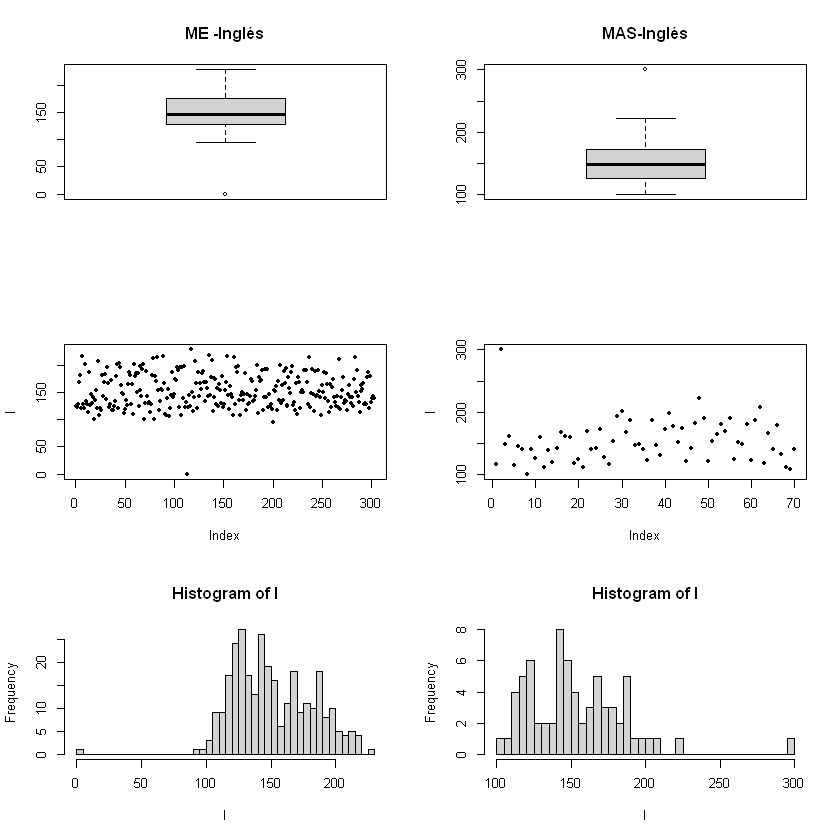

In [42]:
par(mfrow=c(3,2))
with(PTE[muestraEstraficada,], boxplot(I,main = 'ME -Inglés'))
with(PT[Rf1,], boxplot(I, main = 'MAS-Inglés'))

with(PTE[muestraEstraficada,], plot(I, pch = 20))
with(PT[Rf1,], plot(I, pch = 20))

with(PTE[muestraEstraficada,], hist(I, nclass = 50))
with(PT[Rf1,], hist(I, nclass = 50))

par(mfrow=c(1,1))
